___
# Ciência dos Dados - PROJETO 1

# Giovana Cristina Rocha Lemes

# Como a infraestrutura do estado influência no acesso à internet e TV? 
(analisando os principais estados de cada região do Brasil)

# Acesso à internet e Tv

# ___
## Introdução

Através da análise da PNAD 2015 - Domicílios, procuro avaliar como a infraestrutura do estado influência no acesso à internet e TV. As informações escolhidas para traduzir as condições estruturais foram, descarte de lixo, abastecimento de água, rede de esgoto e energia. Além disso, um estado de cada região do Brasil foi selecionado para ter os dados analisados e comparados nesse projeto, sendo esses, São Paulo(Sudeste), Bahia(Nordeste),Santa Catarina(Sul),Amazonas(Norte) e Goiás(Centro-Oeste). A princípio na averiguação das referências os gráficos mostrados devem ser equivalentes a cada estado em particular, mostrando os diferentes valores para cada categoria e assim, evidenciando as condições encontradas no local. Após o reconhecimento individual os resultados devem ser cruzados de maneira à classificar o melhor e o pior colocado em certo quesito. Ao fim dessa última etapa o esperado é que os resultados sejam suficientes para a última comparação, a qual, inclui os dados de acesso à internet e TV de cada estado. Dessa forma, a conclusão poderá apresentar uma grande influência da infraestrutura sobre a disponibilidade de sinal de ambos (TV e internet), quanto apresentar pouca influência ou até mesmo nenhuma. A renda de cada estado também é um fator muito importante a ser avaliado, pois através da mesma pode-se descrever melhor alguns comportamentos nos gráficos e também situações históricas que podem ter influenciado tal circunstância. 


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('ggplot')

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\giiol\OneDrive\Documentos\GitHub\cienciadosdados


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
Documento = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

# TABELA INICIAL
Nessa primeira tabela estão todas as variáveis escolhidas para a análise do problema.

In [4]:
#tabela = pd.DataFrame({"Unidade da Federação":Documento.UF,"Tem televisão com recepçao de sinal digital de tv aberta":Documento.V02273, "Tem televisão com antena parabólica": Documento.V02274, "Tem acesso à Internet no próprio domicilio": Documento.V02322, "Para acessar à Internet utiliza-se telefone celular":Documento.V02324, "O acesso à Internet é feito através de sinal de rede celular 3G ou 4G":Documento.V02424,"O acesso à Internet é feito através de conexão discada por linha telefônica":Documento.V02425})
tabela_resumida = Documento.loc[ : ,["UF","V02273","V02274","V02322","V02324","V02424","V02425","V4622","V4624","V02426","V0219", "V0218", "V0217", "V0212","V4621"]]
tabela_resumida.to_csv("resumo.csv")

In [5]:
tabela_não_nula = tabela_resumida[pd.notnull(Documento.UF)& pd.notnull(Documento.V02273)& pd.notnull(Documento.V02274) & pd.notnull(Documento.V02322)& pd.notnull(Documento.V02324)& pd.notnull(Documento.V02424)& pd.notnull(Documento.V02425)& pd.notnull(Documento.V4622)& pd.notnull(Documento.V4624)& pd.notnull(Documento.V02426)& pd.notnull(Documento.V0219)& pd.notnull(Documento.V0218)& pd.notnull(Documento.V0217)& pd.notnull(Documento.V0212)   ]
#Código para renomear
#tabela_não_nula = tabela_não_nula.rename(columns = {"V02273":"Tem televisão com recepçao de sinal digital de tv aberta",  "V02274":"Tem televisão com antena parabólica", "V02322":"Tem acesso à Internet no próprio domicilio", "V02324":"Para acessar à Internet utiliza-se telefone celular", "V02424":"O acesso à Internet é feito através de sinal de rede celular 3G ou 4G","V02425":"O acesso à Internet é feito através de conexão discada por linha telefônica"})
tabela_não_nula.V02273 = Documento.V02273.astype('category')
tabela_não_nula.V02273.cat.categories = (['Sim','Não','Não Sabe'])
tabela_não_nula.V02274 = Documento.V02274.astype('category')
tabela_não_nula.V02274.cat.categories = (['Sim','Não','Não Sabe'])
tabela_não_nula.V02322 = Documento.V02322.astype('category')
tabela_não_nula.V02322.cat.categories = (['Sim','Não'])
tabela_não_nula.V02324 = Documento.V02324.astype('category')
tabela_não_nula.V02324.cat.categories = (['Sim','Não'])
tabela_não_nula.V02424 = Documento.V02424.astype('category')
tabela_não_nula.V02424.cat.categories = (['Sim','Não'])
tabela_não_nula.V02425 = Documento.V02425.astype('category')
tabela_não_nula.V02425.cat.categories = (['Sim','Não'])
tabela_não_nula.UF = tabela_não_nula.UF.astype('category')
tabela_não_nula.UF.cat.categories = (['Rondônia', 'Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piaui','Ceará','Rio Grande do Norte','Paraíba','Pernamnuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de janeiro','Sâo Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])

tabela_não_nula.V4622 = Documento.V4622.astype('category')
tabela_não_nula.V4622.cat.categories = (['Sem rendimento','Até ¼ salário mínimo','Mais de ¼ até ½ salário mínimo','Mais de ½ até 1 salário mínimo','Mais de 1 até  2 salários mínimos','Mais de  2 até  3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5 salários mínimos','Sem declaração'])

tabela_não_nula.V4624 = Documento.V4624.astype('category')
tabela_não_nula.V4624.cat.categories = (['Rede geral com canalização interna','Poço ou nascente com canalização interna','Outra procedência com canalização interna','Rede geral sem canalização interna','Poço ou nascente sem canalização interna','Outra procedência sem canalização interna'])
tabela_não_nula.V02426 = Documento.V02426.astype('category')
tabela_não_nula.V02426.cat.categories = (['Sim','Não'])
tabela_não_nula.V0219 = Documento.V0219.astype('category')
tabela_não_nula.V0219.cat.categories = (['Elétrica (de rede, gerador, solar)','Óleo, querosene ou gás de botijão','Outra forma'])
tabela_não_nula.V0218 = Documento.V0218.astype('category')
tabela_não_nula.V0218.cat.categories = (['Coletado diretamente' , 'Coletado indiretamente', 'Queimado ou enterrado na propriedade','Jogado em terreno baldio ou logradouro','Jogado em rio, lago ou mar','Outro destino'])
tabela_não_nula.V0217 = Documento.V0217.astype('category')
tabela_não_nula.V0217.cat.categories = (['Rede coletora de esgoto ou pluvial','Fossa séptica ligada a rede coletora de esgoto ou pluvial','Fossa séptica não ligada a rede coletora de esgoto ou pluvial','Fossa rudimentar','Vala','Direto para o rio, lago ou mar','Outra forma'])
tabela_não_nula.V0212 = Documento.V0212.astype('category')
tabela_não_nula.V0212.cat.categories = (['Rede geral de distribuição','Poço ou nascente','Outra proveniência'])


#tabela_não_nula[(tabela_não_nula.UF=='Sâo Paulo') | (tabela_não_nula.UF=='Acre') ]
#tabela_não_nula = tabela_não_nula.rename(columns = {"V02273":"Tem televisão com recepçao de sinal digital de tv aberta",  "V02274":"Tem televisão com antena parabólica", "V02322":"Tem acesso à Internet no próprio domicilio", "V02324":"Para acessar à Internet utiliza-se telefone celular", "V02424":"O acesso à Internet é feito através de sinal de rede celular 3G ou 4G","V02425":"O acesso à Internet é feito através de conexão discada por linha telefônica","V4622": "Faixa do rendimento mensal domiciliar per capita ", "V4624": "Forma de abastecimento de água" , "V02426": "O acesso à Internet é feito por banda larga", "V0219":"Forma de iluminação do domicílio", "V0218": "Destino do lixo domiciliar ", "V0217": "Forma de escoadouro do banheiro ou sanitário","V0212": "Proveniência da água canalizada utilizada no domicílio"})



C:\Users\giiol\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


# Tabela não nula e com colunas relacionadas TV e INTERNET


In [6]:
tabela_não_nula = tabela_não_nula[tabela_não_nula.V4621!=999999999999]
#criar uma nova coluna 'Tem sinal TV'
tabela_não_nula.loc[(tabela_não_nula.V02273=='Sim') | (tabela_não_nula.V02274=='Sim'), 'TV'] = 'Sim'
tabela_não_nula.loc[(tabela_não_nula.V02273=='Não') & (tabela_não_nula.V02274=='Não'), 'TV'] = 'Não'
tabela_não_nula.loc[(tabela_não_nula.V02273=='Sim') & (tabela_não_nula.V02274=='Não'), 'TV'] = 'Sim'
tabela_não_nula.loc[(tabela_não_nula.V02273=='Não') & (tabela_não_nula.V02274=='Sim'), 'TV'] = 'Sim'
#tabela_não_nula.loc[(tabela_não_nula.V02324=='Não') & (tabela_não_nula.V02424=='Não')& (tabela_não_nula.V02322=='Não')& (tabela_não_nula.V02425=='Sim')& (tabela_não_nula.V02426=='Não'), 'internet'] = 'Sim'


tabela_não_nula.loc[(tabela_não_nula.V02424=='Sim')| (tabela_não_nula.V02425=='Sim'), 'internet'] = 'Sim'
tabela_não_nula.loc[(tabela_não_nula.V02424=='Não')& (tabela_não_nula.V02425=='Não'), 'internet'] = 'Não'
tabela_não_nula.loc[(tabela_não_nula.V02424=='Não')& (tabela_não_nula.V02425=='Sim'), 'internet'] = 'Sim'
tabela_não_nula.loc[(tabela_não_nula.V02424=='Sim')& (tabela_não_nula.V02425=='Não'), 'internet'] = 'Sim'



In [7]:

nova = tabela_não_nula.loc[:,["UF", "TV","internet","V4622", "V4624", "V0219","V0218", "V0217", "V0212", "V4621"]]
nova.head()

,UF,TV,internet,V4622,V4624,V0219,V0218,V0217,V0212,V4621
3,Rondônia,Sim,Sim,Mais de 1 até 2 salários mínimos,Poço ou nascente com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Poço ou nascente,793.0
5,Rondônia,Sim,Não,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição,1990.0
8,Rondônia,Sim,Sim,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição,818.0
10,Rondônia,Sim,Sim,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição,1716.0
11,Rondônia,Sim,Sim,Mais de 3 até 5 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição,2500.0


# Inicio da separação dos estados
A partir desse momento cada estados (dos 5 escolhidos) serão avaliados individualmente.
Dados da infraestrutura como esgoto, lixo, água, renda e elétrica.

# SÃO PAULO

In [8]:
#SEPARAÇÃO DAS REGIÕES E SEUS DEVIDOS ESTADOS 
#tabela_não_nula[(tabela_não_nula.UF=='Sâo Paulo') | (tabela_não_nula.UF=='Santa Catarina')| (tabela_não_nula.UF=='Goias')| (tabela_não_nula.UF=='Amazonas')| (tabela_não_nula.UF=='Bahia')  ] 
sao_paulo = nova[nova.UF=='Sâo Paulo']

sao_paulo.head()


,UF,TV,internet,V4622,V4624,V0219,V0218,V0217,V0212,V4621
93132,Sâo Paulo,Sim,Sim,Mais de 5 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,4250.0
93133,Sâo Paulo,Sim,Sim,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,1262.0
93135,Sâo Paulo,Sim,Sim,Mais de 3 até 5 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,3000.0
93140,Sâo Paulo,NaN,Não,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,1550.0
93147,Sâo Paulo,Sim,Sim,Mais de ½ até 1 salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,788.0


In [9]:
nova[nova.UF=='Sâo Paulo'].V0217.value_counts(True)*100

Rede coletora de esgoto ou pluvial                               94.337737
Fossa séptica não ligada a rede coletora de esgoto ou pluvial     2.342622
Fossa séptica ligada a rede coletora de esgoto ou pluvial         1.321195
Fossa rudimentar                                                  1.154657
Direto para o rio, lago ou mar                                    0.655046
Vala                                                              0.133230
Outra forma                                                       0.055512
Name: V0217, dtype: float64

# Renda em São Paulo (por salário)

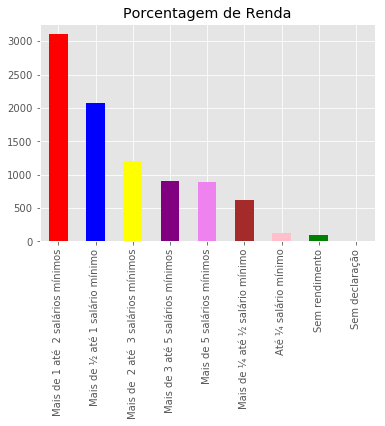

In [45]:
#GRÁFICOS SÃO PAULO RENDA PERCENTUAL
renda_percentual = sao_paulo.V4622.value_counts()
plt.title("Porcentagem de Renda")
renda_percentual.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)





# Renda de São Paulo (valor)

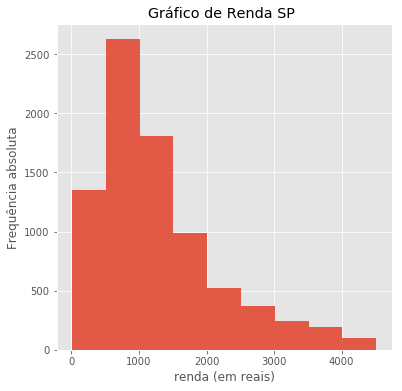

In [11]:
#RENDA 
faixa = range(10,5000,500)
RENDA_SP = pd.cut(sao_paulo.V4621, bins=faixa)
RENDA_SP.value_counts(sort=False, normalize=True)*100
plot = sao_paulo.V4621.plot.hist(bins=faixa,title='Gráfico de Renda SP ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')




# São Paulo (ENERGIA E ABASTECIMENTO)

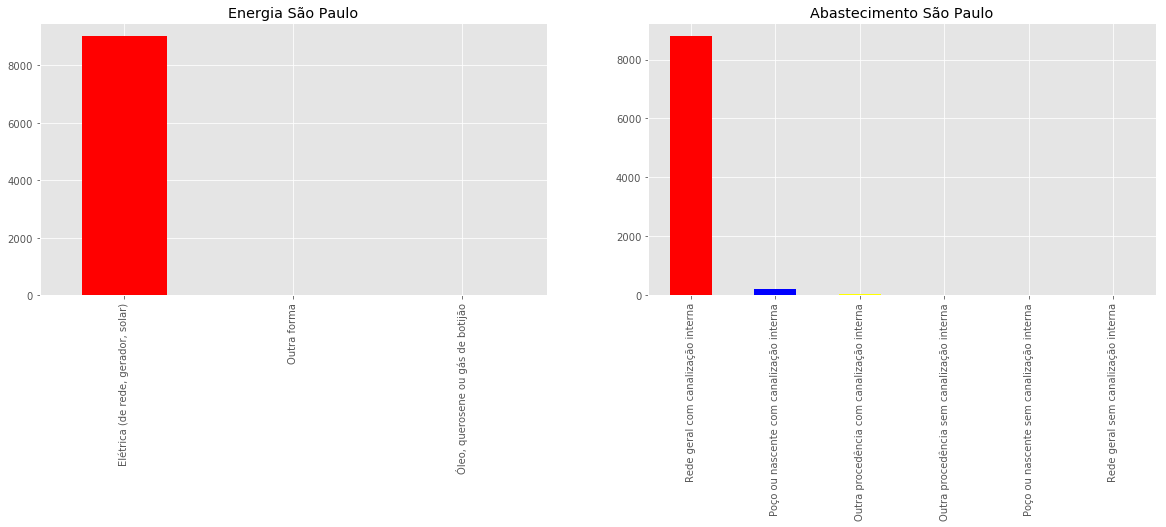

In [12]:
#GRÁFICOS SÃO PAULO ENERGIA
fig = plt.figure(figsize = (20,5))
plt.subplot(121)
energia_sp = sao_paulo.V0219.value_counts()
plt.title("Energia São Paulo")
energia_sp.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS SÃO PAULO ABASTECIMENTO
plt.subplot(122)
abastecimento_sp = sao_paulo.V4624.value_counts()
plt.title("Abastecimento São Paulo")
abastecimento_sp.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

In [13]:
! explorer .

# São paulo (LIXO, ESGOTO, TV E INTERNET)

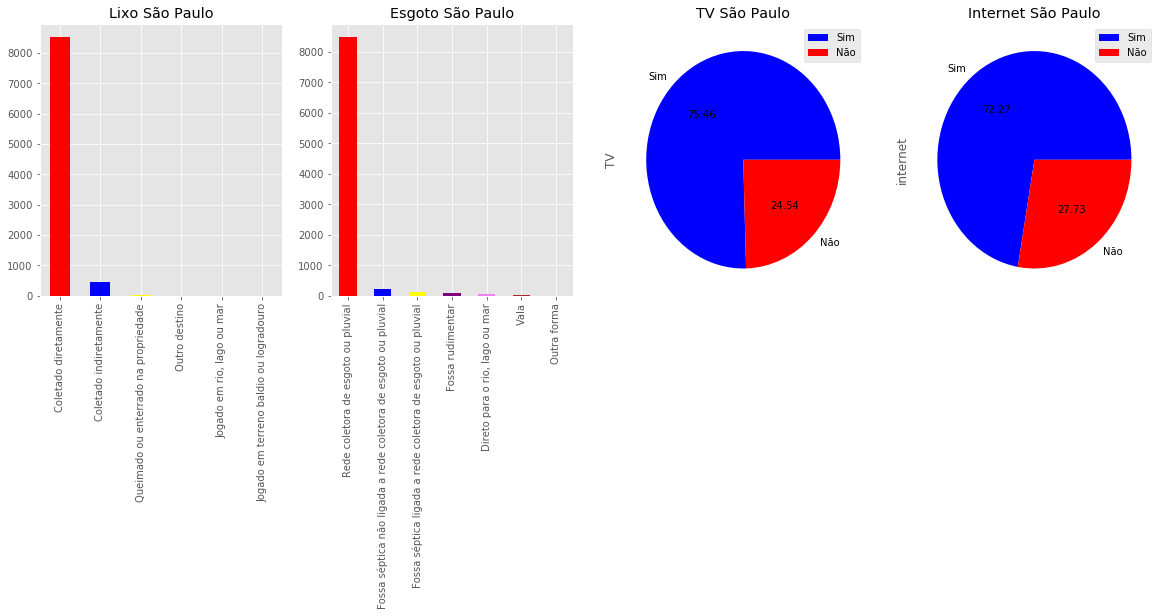

In [14]:
#GRÁFICOS SÃO PAULO LIXO
fig = plt.figure(figsize = (20,5))
plt.subplot(141)
lixo_sp = sao_paulo.V0218.value_counts()
plt.title("Lixo São Paulo")
lixo_sp.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS SÃO PAULO ESGOTO
plt.subplot(142)
esgoto_sp = sao_paulo.V0217.value_counts()
plt.title("Esgoto São Paulo")
esgoto_sp.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS SÃO PAULO TV
plt.subplot(143)
tv_sp = sao_paulo.TV.value_counts()
plt.title("TV São Paulo")
tv_sp.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

#GRÁFICOS SÃO PAULO INTERNET
plt.subplot(144)
internet_sp = sao_paulo.internet.value_counts()
plt.title("Internet São Paulo")
internet_sp.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

# Bahia 

In [15]:
bahia = nova[nova.UF=='Bahia']

bahia.head()

,UF,TV,internet,V4622,V4624,V0219,V0218,V0217,V0212,V4621
53018,Bahia,Sim,Sim,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,819.0
53022,Bahia,Sim,Sim,Mais de 3 até 5 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,2375.0
53023,Bahia,Sim,Sim,Mais de ½ até 1 salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,396.0
53024,Bahia,Sim,Não,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,1862.0
53025,Bahia,Sim,Não,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,1300.0


# Bahia Renda (salário)

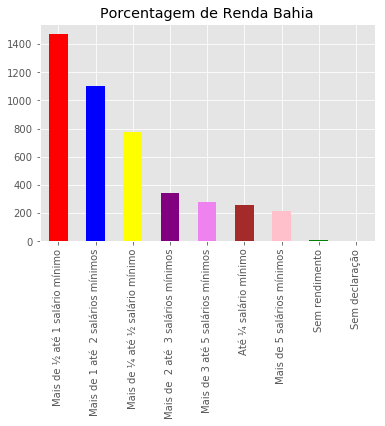

In [16]:
#GRÁFICOS BAHIA RENDA PERCENTUAL
renda_bahia = bahia.V4622.value_counts()
plt.title("Porcentagem de Renda Bahia")
renda_bahia.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

# Renda (valor)

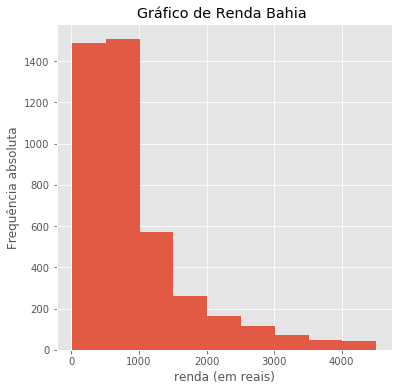

In [17]:
#RENDA 
faixa = range(10,5000,500)
RENDA_bahia = pd.cut(bahia.V4621, bins=faixa)
RENDA_bahia.value_counts(sort=False, normalize=True)*100
plot = bahia.V4621.plot.hist(bins=faixa,title='Gráfico de Renda Bahia ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

# Bahia (ENERGIA E ABASTECIMENTO )

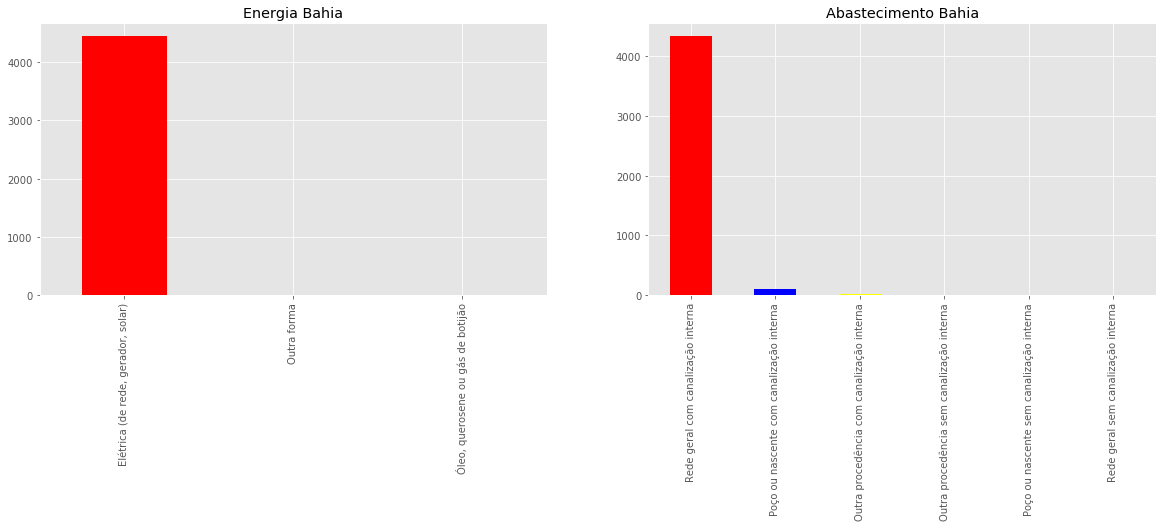

In [18]:
#GRÁFICOS BAHIA ENERGIA
fig = plt.figure(figsize = (20,5))
plt.subplot(121)
energia_bahia = bahia.V0219.value_counts()
plt.title("Energia Bahia")
energia_bahia.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS BAHIA ABASTECIMENTO
plt.subplot(122)
abastecimento_bahia = bahia.V4624.value_counts()
plt.title("Abastecimento Bahia")
abastecimento_bahia.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

# Bahia (LIXO, ESGOTO, TV e INTERNET)

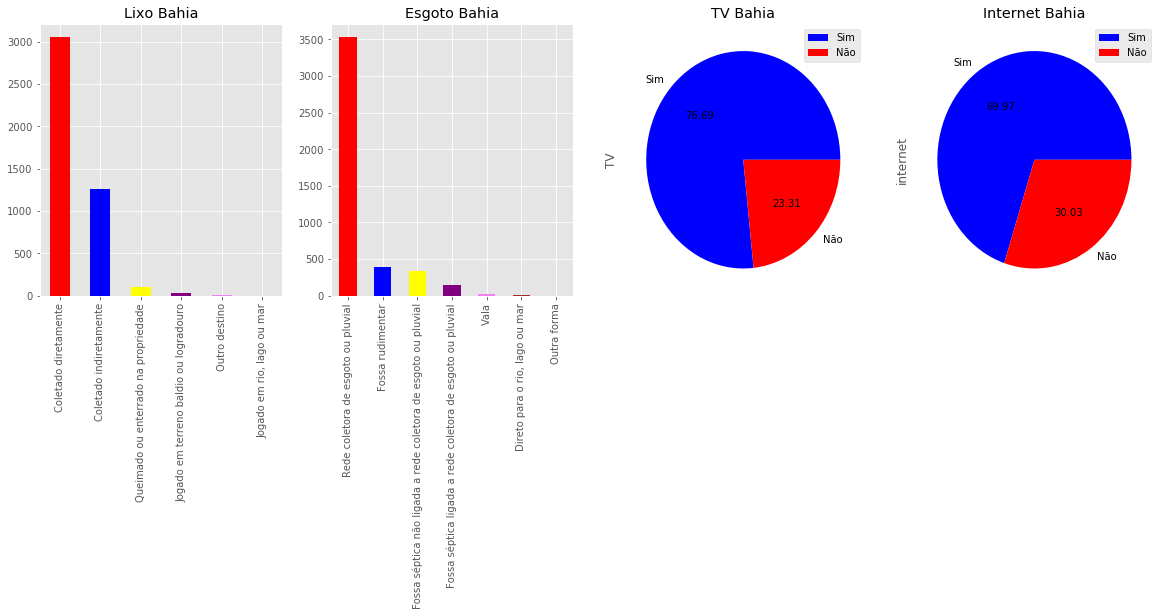

In [19]:
#GRÁFICOS BAHIA LIXO
fig = plt.figure(figsize = (20,5))
plt.subplot(141)
lixo_bahia = bahia.V0218.value_counts()
plt.title("Lixo Bahia")
lixo_bahia.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS BAHIA ESGOTO
plt.subplot(142)
esgoto_bahia = bahia.V0217.value_counts()
plt.title("Esgoto Bahia")
esgoto_bahia.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS BAHIA TV
plt.subplot(143)
tv_bahia = bahia.TV.value_counts()
plt.title("TV Bahia")
tv_bahia.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

#GRÁFICOS BAHIA INTERNET
plt.subplot(144)
internet_bahia = bahia.internet.value_counts()
plt.title("Internet Bahia")
internet_bahia.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

# Santa Catarina

In [20]:
sc = nova[nova.UF=='Santa Catarina']

sc.head()

,UF,TV,internet,V4622,V4624,V0219,V0218,V0217,V0212,V4621
118087,Santa Catarina,Sim,Sim,Mais de ¼ até ½ salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,333.0
118088,Santa Catarina,Sim,Sim,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,1254.0
118090,Santa Catarina,Sim,Sim,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Rede coletora de esgoto ou pluvial,Rede geral de distribuição,2000.0
118091,Santa Catarina,Sim,Sim,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,865.0
118092,Santa Catarina,Não,Sim,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,2160.0


# Santa Catarina Renda (salário)

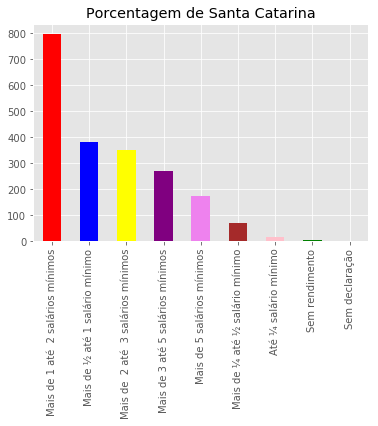

In [21]:
#GRÁFICOS SC RENDA PERCENTUAL
renda_sc = sc.V4622.value_counts()
plt.title("Porcentagem de Santa Catarina")
renda_sc.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

# Santa Catarina Renda (valor)

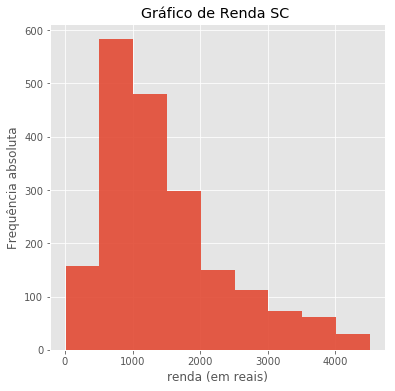

In [22]:
#RENDA 
faixa = range(10,5000,500)
RENDA_sc = pd.cut(sc.V4621, bins=faixa)
RENDA_sc.value_counts(sort=False, normalize=True)*100
plot = sc.V4621.plot.hist(bins=faixa,title='Gráfico de Renda SC ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

# Santa Catarina (ENERGIA E ABASTECIMENTO)

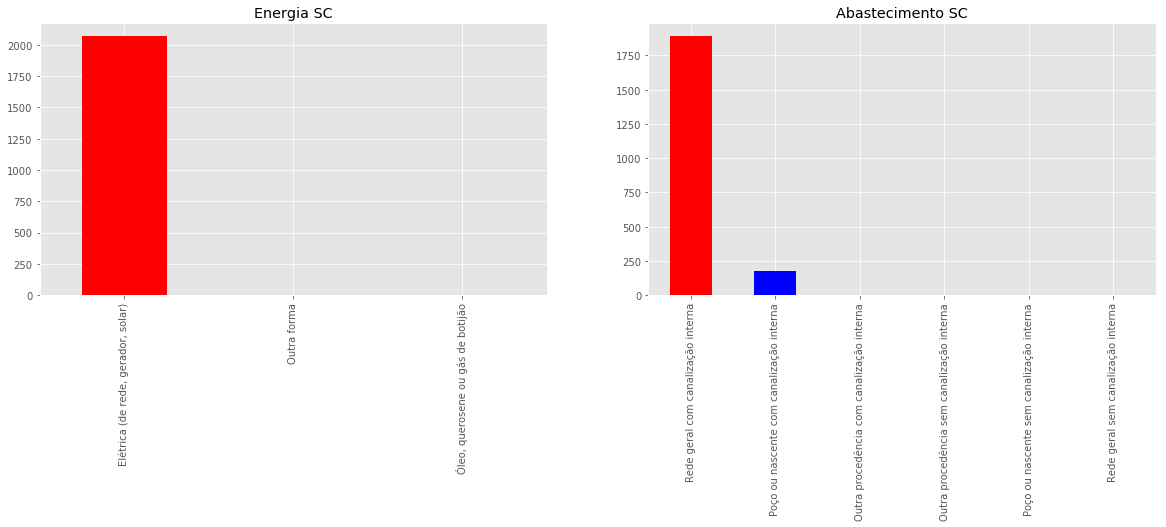

In [23]:
#GRÁFICOS SC ENERGIA
fig = plt.figure(figsize = (20,5))
plt.subplot(121)
energia_sc = sc.V0219.value_counts()
plt.title("Energia SC")
energia_sc.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS SC ABASTECIMENTO
plt.subplot(122)
abastecimento_sc = sc.V4624.value_counts()
plt.title("Abastecimento SC")
abastecimento_sc.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

# Santa Catarina (LIXO, ESGOTO,TV e INTERNET)

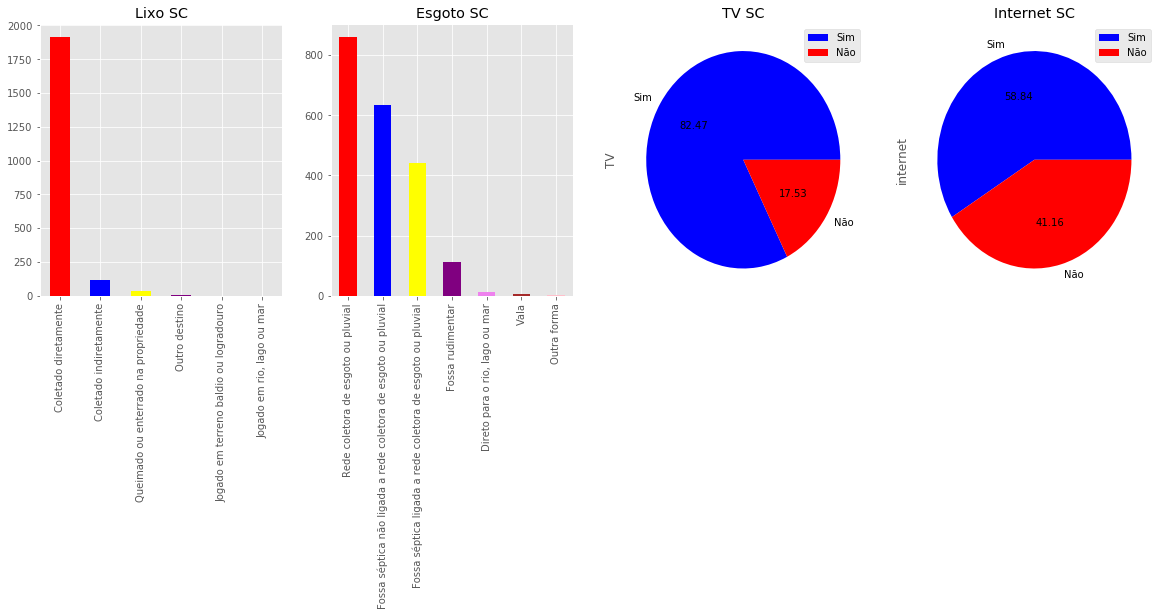

In [24]:
#GRÁFICOS SC LIXO
fig = plt.figure(figsize = (20,5))
plt.subplot(141)
lixo_sc = sc.V0218.value_counts()
plt.title("Lixo SC")
lixo_sc.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS SC ESGOTO
plt.subplot(142)
esgoto_sc = sc.V0217.value_counts()
plt.title("Esgoto SC")
esgoto_sc.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS SC TV
plt.subplot(143)
tv_sc = sc.TV.value_counts()
plt.title("TV SC")
tv_sc.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

#GRÁFICOS SC INTERNET
plt.subplot(144)
internet_sc =sc.internet.value_counts()
plt.title("Internet SC")
internet_sc.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

# Goiás

In [25]:
go = nova[nova.UF=='Goiás']

go.head()

,UF,TV,internet,V4622,V4624,V0219,V0218,V0217,V0212,V4621
140909,Goiás,Não,Sim,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição,833.0
140910,Goiás,Não,Não,Mais de ¼ até ½ salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição,375.0
140912,Goiás,Sim,Não,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição,1250.0
140913,Goiás,Sim,Não,Mais de ½ até 1 salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição,717.0
140915,Goiás,Não,Sim,Mais de ¼ até ½ salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa rudimentar,Rede geral de distribuição,363.0


# Goiás Renda (salário)

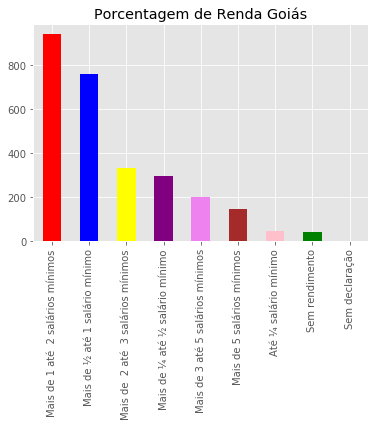

In [26]:
#GRÁFICOS GO RENDA PERCENTUAL
renda_go = go.V4622.value_counts()
plt.title("Porcentagem de Renda Goiás")
renda_go.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

# Goiás Renda (valor)

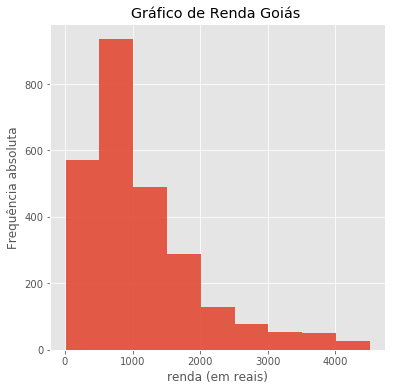

In [27]:
#RENDA 
faixa = range(10,5000,500)
RENDA_go = pd.cut(go.V4621, bins=faixa)
RENDA_go.value_counts(sort=False, normalize=True)*100
plot = go.V4621.plot.hist(bins=faixa,title='Gráfico de Renda Goiás ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')


# Goiás (ENERGIA E ABASTECIMENTO)

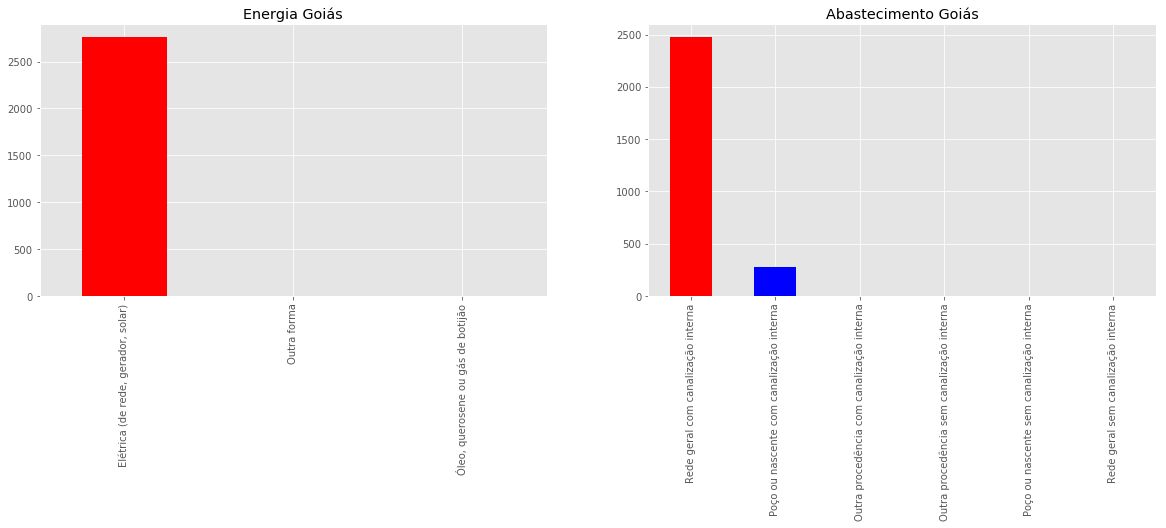

In [28]:
#GRÁFICOS GOIÁS ENERGIA
fig = plt.figure(figsize = (20,5))
plt.subplot(121)
energia_go = go.V0219.value_counts()
plt.title("Energia Goiás")
energia_go.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS GOIÁS ABASTECIMENTO
plt.subplot(122)
abastecimento_go = go.V4624.value_counts()
plt.title("Abastecimento Goiás")
abastecimento_go.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

# Goiás (LIXO, ESGOTO, TV e INTERNET)

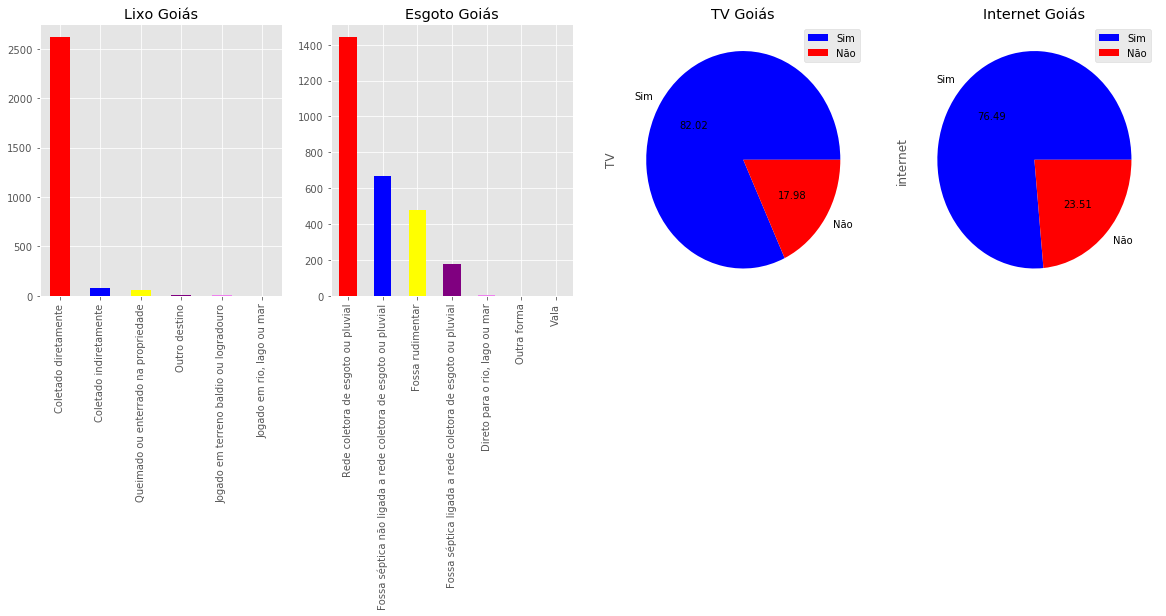

In [29]:
#GRÁFICOS GOIÁS LIXO
fig = plt.figure(figsize = (20,5))
plt.subplot(141)
lixo_go = go.V0218.value_counts()
plt.title("Lixo Goiás")
lixo_go.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS GOIÁS ESGOTO
plt.subplot(142)
esgoto_go = go.V0217.value_counts()
plt.title("Esgoto Goiás")
esgoto_go.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS GOIÁS TV
plt.subplot(143)
tv_go = go.TV.value_counts(True)*100
plt.title("TV Goiás")
tv_go.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

#GRÁFICOS GOIÁS INTERNET
plt.subplot(144)
internet_go = go.internet.value_counts(True)*100
plt.title("Internet Goiás")
internet_go.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

# Amazonas

In [30]:
am = nova[nova.UF=='Amazonas']

am.head()

,UF,TV,internet,V4622,V4624,V0219,V0218,V0217,V0212,V4621
4488,Amazonas,Não,Não,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,2075.0
4496,Amazonas,Não,Não,Mais de ¼ até ½ salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Queimado ou enterrado na propriedade,Vala,Rede geral de distribuição,290.0
4499,Amazonas,Sim,Não,Mais de ½ até 1 salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,592.0
4534,Amazonas,Sim,Sim,Mais de 2 até 3 salários mínimos,Poço ou nascente com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado indiretamente,Fossa séptica não ligada a rede coletora de es...,Poço ou nascente,2250.0
4540,Amazonas,Sim,Sim,Mais de ½ até 1 salário mínimo,Poço ou nascente com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Poço ou nascente,446.0


# Amazonas Renda(salário)

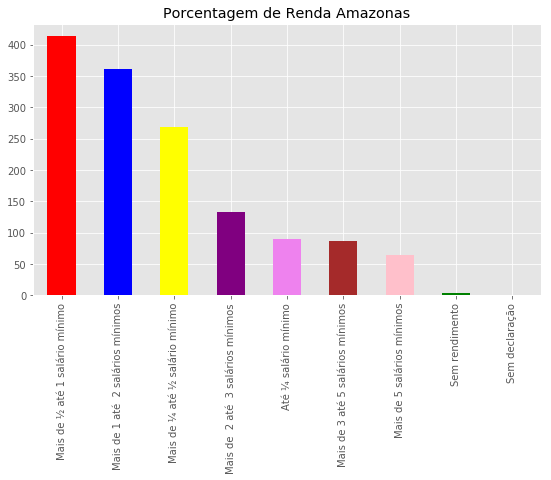

In [31]:
#GRÁFICOS AMAZONAS RENDA PERCENTUAL
fig = plt.figure(figsize = (20,5))
plt.subplot(121)
renda_am = am.V4622.value_counts()
plt.title("Porcentagem de Renda Amazonas")
renda_am.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)




# Amazonas renda (valor)

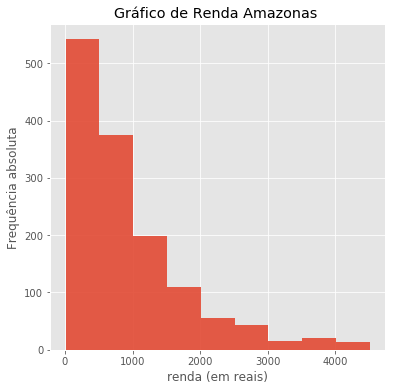

In [32]:
#RENDA 
faixa = range(10,5000,500)
RENDA_am = pd.cut(am.V4621, bins=faixa)
RENDA_am.value_counts(sort=False, normalize=True)*100
plot = am.V4621.plot.hist(bins=faixa,title='Gráfico de Renda Amazonas ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

# Amazonas (ENERGIA E ABASTECIMENTO)

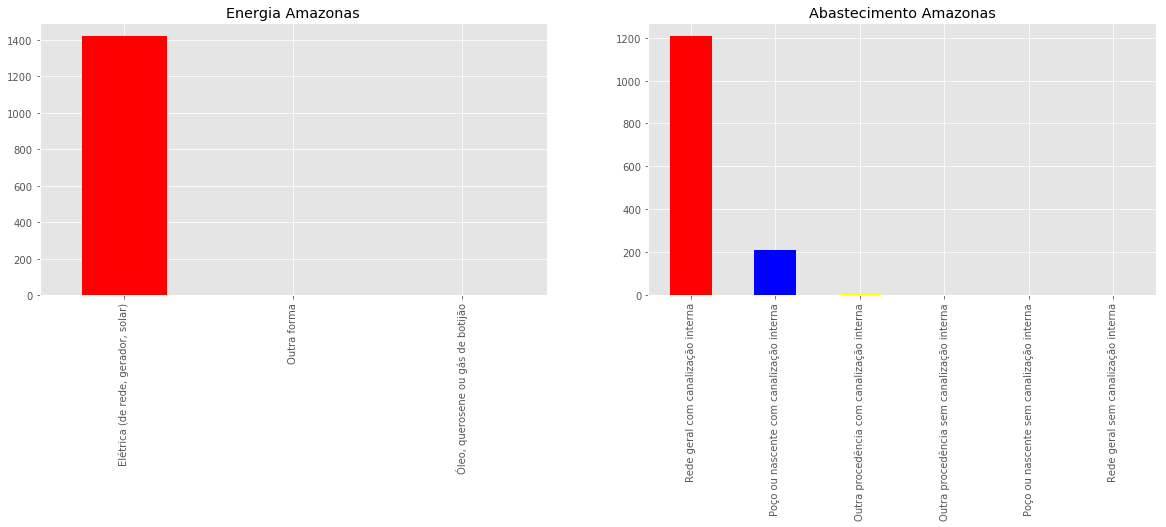

In [33]:
#GRÁFICOS AMAZONAS ENERGIA
fig = plt.figure(figsize = (20,5))
plt.subplot(121)
energia_am = am.V0219.value_counts()
plt.title("Energia Amazonas")
energia_am.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS AMAZONAS ABASTECIMENTO
plt.subplot(122)
abastecimento_am = am.V4624.value_counts()
plt.title("Abastecimento Amazonas")
abastecimento_am.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

# Amazonas (LIXO, ESGOTO, TV e INTERNET)

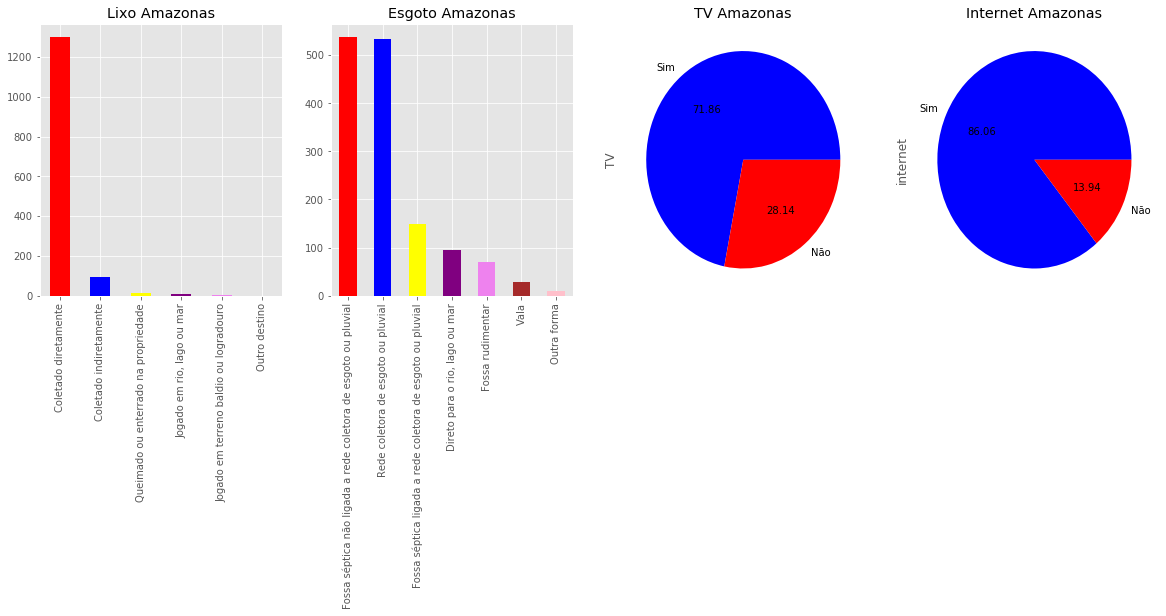

In [34]:
#GRÁFICOS AMAZONAS LIXO
fig = plt.figure(figsize = (20,5))
plt.subplot(141)
lixo_am = am.V0218.value_counts()
plt.title("Lixo Amazonas")
lixo_am.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS AMAZONAS ESGOTO
plt.subplot(142)
esgoto_am = am.V0217.value_counts()
plt.title("Esgoto Amazonas")
esgoto_am.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

#GRÁFICOS AMAZONAS TV
plt.subplot(143)
tv_am = am.TV.value_counts(True)*100
plt.title("TV Amazonas")
tv_am.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)

#GRÁFICOS AMAZONAS INTERNET
plt.subplot(144)
internet_am = am.internet.value_counts(True)*100
plt.title("Internet Amazonas")
internet_am.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)

# Tabela com os 5 estados escolhidos para a comparação

In [35]:
#CRIANDO TABELA COM OS 5 ESTADOS ESCOLHIDOS
estados = nova[(nova.UF=='Sâo Paulo')|(nova.UF=='Santa Catarina')|(nova.UF=='Goiás')|(nova.UF=='Amazonas')|(nova.UF=='Bahia')]
estados
#estados[estados.UF=='Sâo Paulo'].V0217.value_counts(True)*100
#Coletado diretamente
#Rede coletora de esgoto ou pluvial 

,UF,TV,internet,V4622,V4624,V0219,V0218,V0217,V0212,V4621
4488,Amazonas,Não,Não,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,2075.0
4496,Amazonas,Não,Não,Mais de ¼ até ½ salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Queimado ou enterrado na propriedade,Vala,Rede geral de distribuição,290.0
4499,Amazonas,Sim,Não,Mais de ½ até 1 salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,592.0
4534,Amazonas,Sim,Sim,Mais de 2 até 3 salários mínimos,Poço ou nascente com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado indiretamente,Fossa séptica não ligada a rede coletora de es...,Poço ou nascente,2250.0
4540,Amazonas,Sim,Sim,Mais de ½ até 1 salário mínimo,Poço ou nascente com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Poço ou nascente,446.0
4542,Amazonas,Sim,Sim,Mais de 1 até 2 salários mínimos,Poço ou nascente com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Poço ou nascente,1000.0
4546,Amazonas,Sim,Sim,Mais de ½ até 1 salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,409.0
4566,Amazonas,Não,Sim,Mais de 1 até 2 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,880.0
4573,Amazonas,Sim,Sim,Mais de ½ até 1 salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,424.0
4580,Amazonas,Sim,Sim,Até ¼ salário mínimo,Poço ou nascente com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado indiretamente,Fossa séptica não ligada a rede coletora de es...,Poço ou nascente,123.0


# RENDA estados

In [36]:
#CRUZAMENTO DE INFORMAÇÕES PARA A CONCLUSÃO
#RENDA
renda_estados= pd.crosstab(estados.UF, estados.V4622, normalize="index")*100
filtro = renda_estados.iloc[[2,15,19,21,25],:]

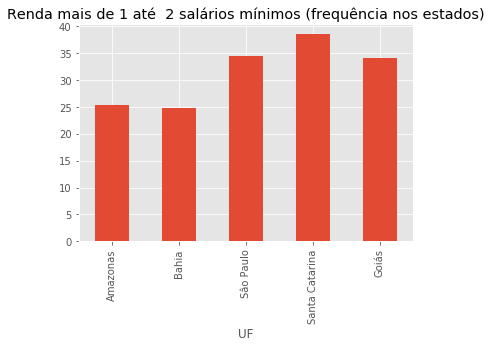

In [37]:
filtro["Mais de 1 até  2 salários mínimos"].plot(kind = "bar")
plt.title("Renda mais de 1 até  2 salários mínimos (frequência nos estados)")

# ENERGIA estados

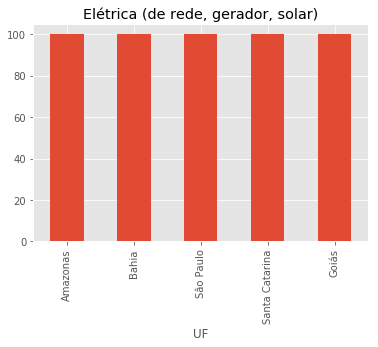

In [38]:
#ENERGIA
energia_estados= pd.crosstab(estados.UF, nova.V0219, normalize="index")*100
filtro_1 = energia_estados.iloc[[2,15,19,21,25],:]
filtro_1["Elétrica (de rede, gerador, solar)"].plot(kind = "bar")
plt.title("Elétrica (de rede, gerador, solar)")

# ABASTECIMENTO (água) estados

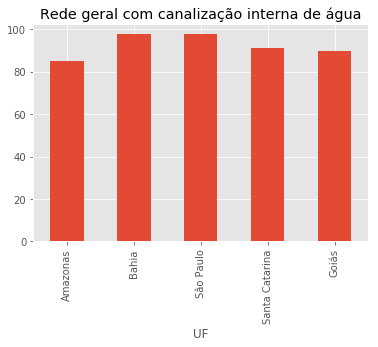

In [39]:
#ÁGUA
agua_estados= pd.crosstab(estados.UF, nova.V4624, normalize="index")*100
filtro_2 = agua_estados.iloc[[2,15,19,21,25],:]
filtro_2["Rede geral com canalização interna"].plot(kind = "bar")
plt.title("Rede geral com canalização interna de água")

# LIXO estados

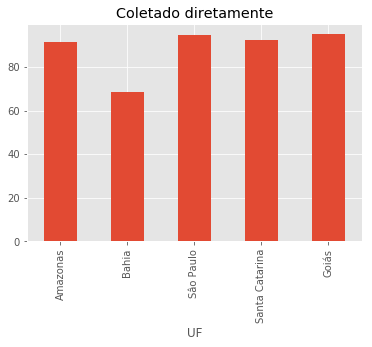

In [40]:
#LIXO
lixo_estados= pd.crosstab(estados.UF, nova.V0218, normalize="index")*100
filtro_3 = lixo_estados.iloc[[2,15,19,21,25],:]
filtro_3["Coletado diretamente"].plot(kind = "bar")
plt.title("Coletado diretamente")

 

# ESGOTO estados

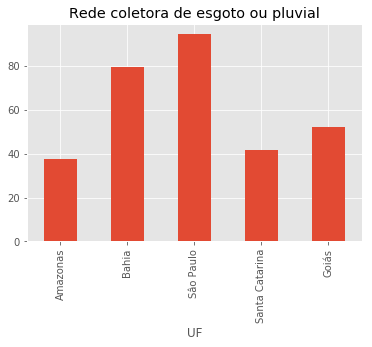

In [41]:
#ESGOTO
esgoto_estados= pd.crosstab(estados.UF, nova.V0217, normalize="index")*100
filtro_4 = esgoto_estados.iloc[[2,15,19,21,25],:]
filtro_4["Rede coletora de esgoto ou pluvial"].plot(kind = "bar")
plt.title("Rede coletora de esgoto ou pluvial")

# TV estados

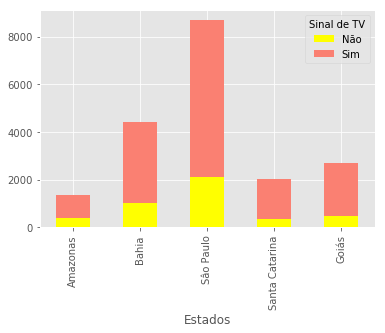

In [42]:
tv_estados= pd.crosstab(estados.UF,estados.TV,rownames=['Estados'], colnames=['Sinal de TV'])
filtro_5 = tv_estados.iloc[[2,15,19,21,25],:] 
filtro_5.plot.bar(color=('yellow', 'salmon', 'blue', 'red', 'green'), stacked=True)

# INTERNET estados

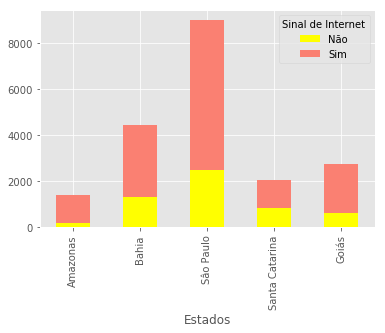

In [43]:
internet_estados= pd.crosstab(estados.UF,estados.internet,rownames=['Estados'], colnames=['Sinal de Internet'])
filtro_6 = internet_estados.iloc[[2,15,19,21,25],:] 
filtro_6.plot.bar(color=('yellow', 'salmon', 'blue', 'red', 'green'), stacked=True)

___
## Conclusão 

# Tabela Final com colunas renomeadas

In [44]:
nova = nova.rename(columns = {"V02273":"Tem televisão com recepçao de sinal digital de tv aberta",  "V02274":"Tem televisão com antena parabólica", "V02322":"Tem acesso à Internet no próprio domicilio", "V02324":"Para acessar à Internet utiliza-se telefone celular", "V02424":"O acesso à Internet é feito através de sinal de rede celular 3G ou 4G","V02425":"O acesso à Internet é feito através de conexão discada por linha telefônica","V4622":"Faixa do rendimento mensal domiciliar per capita ","V4624":"Forma de abastecimento de água","V02426":"O acesso à Internet é feito por banda larga","V0219":"Forma de iluminação do domicílio","V0218":"Destino do lixo domiciliar ","V0217":"Forma de escoadouro do banheiro ou sanitário","V0212":"Proveniência da água canalizada utilizada no domicílio","V4621":"Renda"})
final= nova[(nova.UF=='Sâo Paulo')|(nova.UF=='Santa Catarina')|(nova.UF=='Goiás')|(nova.UF=='Amazonas')|(nova.UF=='Bahia')]
final.head()


,UF,TV,internet,Faixa do rendimento mensal domiciliar per capita,Forma de abastecimento de água,Forma de iluminação do domicílio,Destino do lixo domiciliar,Forma de escoadouro do banheiro ou sanitário,Proveniência da água canalizada utilizada no domicílio,Renda
4488,Amazonas,Não,Não,Mais de 2 até 3 salários mínimos,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,2075.0
4496,Amazonas,Não,Não,Mais de ¼ até ½ salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Queimado ou enterrado na propriedade,Vala,Rede geral de distribuição,290.0
4499,Amazonas,Sim,Não,Mais de ½ até 1 salário mínimo,Rede geral com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Rede geral de distribuição,592.0
4534,Amazonas,Sim,Sim,Mais de 2 até 3 salários mínimos,Poço ou nascente com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado indiretamente,Fossa séptica não ligada a rede coletora de es...,Poço ou nascente,2250.0
4540,Amazonas,Sim,Sim,Mais de ½ até 1 salário mínimo,Poço ou nascente com canalização interna,"Elétrica (de rede, gerador, solar)",Coletado diretamente,Fossa séptica não ligada a rede coletora de es...,Poço ou nascente,446.0


# Análise de Renda 

 Ao analisar o gráfico "Renda estados", no qual encontram-se os dados de cada um dos cinco estados escolhidos de acordo com a
frequencia de "Mais de 1 até  2 salários mínimos". Pode-se dizer que São Paulo se destaca junto com Santa Catarina no topo dos
que mais ganham, enquanto Amazonas e Bahia ficam em último. O destaque de Santa Catarina quanto ao elevado salário foi citado 
no noticiário online "Notícia do Dia" (ndonline.com.br), o qual discute o fato de que o estado se destacou com elevados salários em maio de 2015 comparado com os outros. O site ainda mostra um ranking das profissões que mais receberam durante o ano.

# Análise de Energia

O gráfico "Energia estados" indica a frequência do meio mais eficiente de distribuição de energia, no caso, Elétrica 
(de rede, gerador, solar) nos cinco estados. Todos os respectivos apresentam alto nivel pela análise, portanto esse quesito 
foi neutralizado, servindo somente como um parâmetro inicial considerado para infraestrutura. Segundo o site Portal Brasil  (www.brasil.gov.br) a energia elétrica chega a 97.8% dos domicílios, confirmando o comportamento dos gráficos de energia com niveis elevados em todos os estados escolhidos.

# Análise Abastecimento (Água)

 Ao observar o gráfico "Abastecimento estados", pode-se dizer que o estado de São Paulo se destaca quanto ao nivel do melhor tipo de fornecimento de água, no caso, rede geral com canalização interna, enquanto que Amazonas fica em último lugar. No site "Trata Brasil" (www.tratabrasil.org.br) a questão da distribuição de água no Brasil é discutida e um dos dados destacados é de que "a região Sudeste apresenta 91,16% de atendimento total de água; enquanto isso, o Norte apresenta índice de 56,9%.", tal afirmação é coerente com o que foi análisado através dos gráficos de abastecimento nos cinco estados.

# Análise Lixo

 Analisando-se o gráfico "Lixo estados", percebe-se que São Paulo se destaca com maior nivel de lixo coletado diretamente enquanto Bahia e Amazonas ficam em último lugar. 

# Análise Esgoto

 No gráfico "Esgoto estados" o Amazonas é desbancado pelos outros estados, apresentando um nível de rede coletora de esgoto 
ou pluvial baixo. No site do G1 (g1.globo.com) uma noticía sobre o saneamento básico da região Norte onde se localiza o Amazonas, demonstra que a região possui pouca estrutura e a sua população sofre com apenas 7,4% do total tendo acesso a rede de esgoto. No site "Trata Brasil" as informações são de que apenas 16,42% do esgoto é tratado, e o índice de atendimento total é de 8,66%. A pior situação entre todas as regiões. Além disso, o site também destaca que na região Sudeste onde São Paulo esta localizada, 47,39% do esgoto é tratado e o índice de atendimento total de esgoto é de 77,23%. Tais dados confirmam o que foi analisado através das comparações. 

# Internet 

 Ao interpretar as informações gerais dos gráficos o esperado era chegar em dois estados opostos quanto ao nivel de infraestrutura, dessa forma, pode-se dizer que São Paulo se destaca, enquanto Amazonas fica em último na análise. Ao comparar o nivel de acesso a internet de ambos, os dados obtidos são de que 72.28% da população paulistana tem acesso a algum tipo de sinal de internet, enquanto 27.72% não. O estado do Amazonas apresenta 86.06% da população com acesso e apenas 13.94% sem acesso a internet. Dessa forma, não foi possivel provar nesse quesito que a infraestrutura interfere no acesso, pois o esperado seria que o Amazonas obtivesse um resultado pior com relação a São Paulo.

# TV

 Ao analisar as informações relacionadas ao sinal de TV em cada um dos dois estados o resultado obtido foi de que 71,4% da população de São Paulo possui acesso a TV e 28,6% não, em contrapartida no Amazonas 67,22% da população tem acesso e 32,78% não.
 Dessa forma pode-se observar que o comportamento esperado entre os estados realmente aconteceu, ou seja, o que apresenta maior infraestrutura (São Paulo) obteve um amplo acesso a TV em comparação ao estado com menor infraestrutura (Amazonas).

# Fechamento de idéias

 A pergunta a ser respondida desde o inicio do projeto é, "Como a infraestrutura do estado influência no acesso a internet e TV?", assim, a estratégia adotada foi de analisar parâmetros considerados importantes para a estrutura do estado, dessa forma, os temas escolhidos foram, saneamento básico, abastecimento de água, fornecimento de energia e descarte de lixo. Dados do ano de 2015 foram verificados e através dos gráficos gerados, uma averiguação individual de cada estado foi feita. Com base nos resultados dos cinco estados, dois se destacaram de maneiras opostas, no caso, São Paulo como bem desenvolvido e Amazonas com sérios problemas nos quesitos avaliados. Após obter os dois estados principais para a resposta da pesquisa, uma última observação foi feita, qual era a porcentagem de acesso a internet e tv em ambos. Com essa última avaliação um dos resultados obtidos foi inesperado, no caso, o nivel de acesso a internet em São Paulo teve uma porcentagem menor do que em Amazonas. Uma hipótese que pode explicar o comportamento do gráfico é o fato de que o Amazonas tem uma grande parcela da sua população inacessível, como índios, portanto, essa característica poderia influênciar para que o número de pessoas sem acesso fosse menor do que em São Paulo. Para a conclusão das idéias, ou seja, a resposta da pergunta inicial, pode-se afirmar que o parâmetro de infraestrutura de certa forma inclui o acesso as redes de comunicação, portanto mesmo sem uma comprovação do que foi esperado no início, os quesitos avaliados podem sim influenciar no resultado do sinal de internet e TV, pois  um estado que possui bom desempenho nesses, também obterá estrutura para outros meios, porém, essa influência não pode ser percebida com clareza nos gráficos pela interferência de outros fatores como o alcançe da pesquisa.